In [1]:
from IPython.display import Image

def display_graphics(g):
    g.save("/tmp/test.png")
    return Image("/tmp/test.png")

#latex.add_to_preamble(r"\usepackage{amsmath}")
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}')
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

In [2]:
import sage.all as sg

In [3]:
from flowstar.reachability import *
# flowstar.reachability must be imported before sage otherwise
# sage breaks the flow* yacc parser

In [4]:
from ulbc.bondcalculus import *

In [5]:
m = BondModel("models/plantclock.biocpi")

Running cmd: 'load "models/plantclock.biocpi"' ...


In [6]:
p = BondProcess("Pi", m); p

BondProcess('Pi', <ulbc.bondcalculus.BondModel object at 0x7efa1bdf1668>)

In [7]:
#s = p.as_system; s
s = System.load_from_script('/tmp/bond-sage-script-l0s67857.py'); s

System(R, (x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13), [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], (0, -0.300000000000000*x1 + x10, 0, 0.640000000000000*x13 - 0.560000000000000*x3, -0.380000000000000*x4 + x8, -0.680000000000000*x5 + 1.18000000000000*x9, 0, 0, -0.570000000000000*x8 + 1.50000000000000/(0.277008310249308?*x3^2.00000000000000 + 0.277008310249308?*x4^2.00000000000000 + 7.71604938271605?*x5^2.00000000000000 + 1), -0.530000000000000*x9 + 7.60000000000000/(39.06249999999999?*x1^2.00000000000000 + 0.694444444444445?*x3^2.00000000000000 + 1), -0.350000000000000*x10 + (1.50000000000000*x5^2.00000000000000/(x5^2.00000000000000 + 0.0576000000000000) + 1.30000000000000)/(18.90359168241966?*x3^2.00000000000000 + 11.11111111111111?*x4^2.00000000000000 + 1), 0, x7, -0.240000000000000*x13 + 1/(0.250000000000000*x3^2.00000000000000 + 4.72589792060492?*x5^2.00000000000000 + 1)), varmap={'Gene(cCL,tCL,dMCL,dCL,iCL;)': x0, 'Protein(dP97,iP97;)': x1, 'Gene(cEL,tEL,dMEL,dEL,i

In [8]:
from ulbc.logic import *

In [9]:
s.PR

Multivariate Polynomial Ring in x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13 over Real Interval Field with 53 bits of precision

In [10]:
s.v("Protein(dEL,iEL;)").parent()

Symbolic Ring

In [11]:
at = Atomic(s.v("Protein(dEL,iEL;)") - 1.5); at

Atomic(x4 - 1.50000000000000)

In [12]:
g = at.visualize(s, 11, order=4, step=0.02, tentative_unpreconditioning=True)

ode in symbolic ring
str_odes = ['[0.000000000000000, 0.000000000000000]', 'x1*[-0.300000000000000, -0.300000000000000] + x10', '[0.000000000000000, 0.000000000000000]', 'x13*[0.640000000000000, 0.640000000000000] + x3*[-0.560000000000000, -0.560000000000000]', 'x4*[-0.380000000000000, -0.380000000000000] + x8', 'x5*[-0.680000000000000, -0.680000000000000] + x9*[1.18000000000000, 1.18000000000000]', '[0.000000000000000, 0.000000000000000]', '[0.000000000000000, 0.000000000000000]', 'x8*[-0.570000000000000, -0.570000000000000] + ([1.50000000000000, 1.50000000000000])/((x3)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x4)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x5)^2.00000000000000*[7.71604938271604, 7.71604938271606] + [1.00000000000000, 1.00000000000000])', 'x9*[-0.530000000000000, -0.530000000000000] + ([7.60000000000000, 7.60000000000000])/((x1)^2.00000000000000*[39.0624999999999, 39.0625000000000] + (x3)^2.00000000000000*[0.694444444444444, 0.6944444

/usr/lib64/python3.7/site-packages/numpy/core/getlimits.py:400: UserWarning: Signature b'\x99\x99\x99\x99\x99\x99\xb9\xbf' for <class 'numpy.float64'> does not match any known type: falling back to type probe function
  machar = _get_machar(dtype)


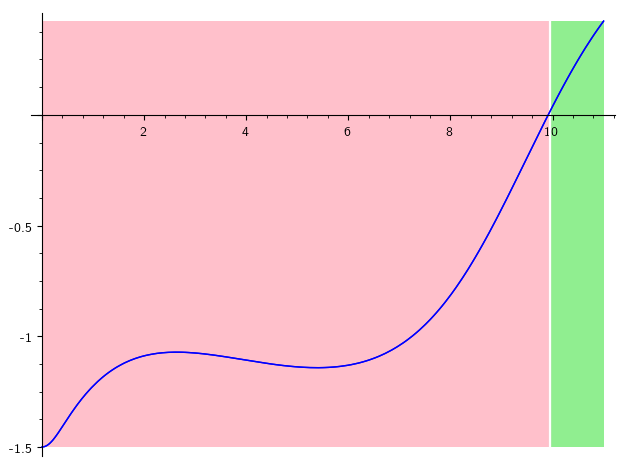

In [13]:
g.set_aspect_ratio('automatic')
g

In [14]:
at.signal_for_system(s, 11, order=4, step=0.02, symbolic_composition=False, tentative_unpreconditioning=False, verbosity=4)

ode in symbolic ring
str_odes = ['[0.000000000000000, 0.000000000000000]', 'x1*[-0.300000000000000, -0.300000000000000] + x10', '[0.000000000000000, 0.000000000000000]', 'x13*[0.640000000000000, 0.640000000000000] + x3*[-0.560000000000000, -0.560000000000000]', 'x4*[-0.380000000000000, -0.380000000000000] + x8', 'x5*[-0.680000000000000, -0.680000000000000] + x9*[1.18000000000000, 1.18000000000000]', '[0.000000000000000, 0.000000000000000]', '[0.000000000000000, 0.000000000000000]', 'x8*[-0.570000000000000, -0.570000000000000] + ([1.50000000000000, 1.50000000000000])/((x3)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x4)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x5)^2.00000000000000*[7.71604938271604, 7.71604938271606] + [1.00000000000000, 1.00000000000000])', 'x9*[-0.530000000000000, -0.530000000000000] + ([7.60000000000000, 7.60000000000000])/((x1)^2.00000000000000*[39.0624999999999, 39.0625000000000] + (x3)^2.00000000000000*[0.694444444444444, 0.6944444

not using mask!
skipping given consistent value over domain
===
reached detect roots t=[2.97999999999993..2.9800000000000026] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[2.999999999999929..3.0000000000000027] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[3.019999999999928..3.0200000000000027] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[3.039999999999927..3.0400000000000027] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[3.0599999999999263..3.0600000000000027] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[3.0799999999999255..3.0800000000000027] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[3.0999999999999246..3.1000000000000028] + [0.0..0.02]
not using m

reached detect roots t=[5.239999999999804..5.240000000000032] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[5.259999999999803..5.260000000000033] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[5.279999999999801..5.280000000000033] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[5.2999999999998..5.300000000000034] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[5.319999999999799..5.320000000000034] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[5.339999999999797..5.3400000000000345] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[5.359999999999796..5.360000000000035] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots 

===
reached detect roots t=[7.099999999999682..7.100000000000075] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[7.11999999999968..7.120000000000076] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[7.139999999999679..7.140000000000076] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[7.159999999999678..7.1600000000000765] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[7.179999999999676..7.180000000000077] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[7.199999999999675..7.2000000000000774] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[7.219999999999674..7.220000000000078] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect 

===
reached detect roots t=[9.359999999999472..9.360000000000188] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[9.37999999999947..9.380000000000189] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[9.399999999999467..9.40000000000019] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[9.419999999999465..9.420000000000192] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[9.439999999999463..9.440000000000193] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[9.45999999999946..9.460000000000194] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[9.479999999999459..9.480000000000196] + [0.0..0.02]
not using mask!
skipping given consistent value over domain
===
reached detect root

Signal([0.0000000000000000 .. 11.000000000000000], [([0.0000000000000000 .. 9.9147762279936434], False), ([9.9164289290780622 .. 11.000000000000000], True)], mask=None)

In [15]:
at.signal_for_system(s, 11, order=4, step=0.02, symbolic_composition=False, precondition=1, tentative_unpreconditioning=True, verbosity=4)

ode in symbolic ring
str_odes = ['[0.000000000000000, 0.000000000000000]', 'x1*[-0.300000000000000, -0.300000000000000] + x10', '[0.000000000000000, 0.000000000000000]', 'x13*[0.640000000000000, 0.640000000000000] + x3*[-0.560000000000000, -0.560000000000000]', 'x4*[-0.380000000000000, -0.380000000000000] + x8', 'x5*[-0.680000000000000, -0.680000000000000] + x9*[1.18000000000000, 1.18000000000000]', '[0.000000000000000, 0.000000000000000]', '[0.000000000000000, 0.000000000000000]', 'x8*[-0.570000000000000, -0.570000000000000] + ([1.50000000000000, 1.50000000000000])/((x3)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x4)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x5)^2.00000000000000*[7.71604938271604, 7.71604938271606] + [1.00000000000000, 1.00000000000000])', 'x9*[-0.530000000000000, -0.530000000000000] + ([7.60000000000000, 7.60000000000000])/((x1)^2.00000000000000*[39.0624999999999, 39.0625000000000] + (x3)^2.00000000000000*[0.694444444444444, 0.6944444

doing tentative_unpreconditioning
f_domain = [-1.0726630860875834..-1.0723341368437662]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[2.4999999999999507..2.500000000000002] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.072454111019929..-1.0721554954677435]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[2.51999999999995..2.5200000000000022] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.07227538547001..-1.072006501787901]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[2.539999999999949..2.5400000000000023] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.0721263044446514..-1.0718865575636338]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[2.559999999999948..2.5600000000000023] + [0.0..0.02]
not using mask!
doing tentati

reached detect roots t=[5.339999999999797..5.3400000000000345] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.141977664779129..-1.1417949243669654]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[5.359999999999796..5.360000000000035] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.1420007844339548..-1.1418377532722244]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[5.379999999999795..5.380000000000035] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.1420031710894238..-1.1418601569284865]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[5.399999999999793..5.400000000000036] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.1419917669923894..-1.1418413997778118]
skipping given consistent value over domain (unpreconditioned)
===
reached dete

===
reached detect roots t=[8.1999999999996..8.20000000000011] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-0.7496501772362423..-0.7423124766609154]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[8.219999999999597..8.22000000000011] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-0.7427189754225421..-0.7353106790097736]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[8.239999999999595..8.240000000000112] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-0.7357207529580312..-0.7282422213418857]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[8.259999999999593..8.260000000000113] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-0.7286558884342118..-0.7211075088307479]
skipping given consistent value over domain (unpreconditioned)
===
reached dete

roots = [[9.9147762279936433 .. 9.9164289290780623]]
domain = [0.0000000000000000 .. 11.000000000000000]
roots = [[9.9147762279936433 .. 9.9164289290780623]]
seg_domain = [0.0000000000000000 .. 11.000000000000000]
roots = [[9.9147762279936433 .. 9.9164289290780623]]
Monitored signal 1.0069022178649902 sec


Signal([0.0000000000000000 .. 11.000000000000000], [([0.0000000000000000 .. 9.9147762279936434], False), ([9.9164289290780622 .. 11.000000000000000], True)], mask=None)

In [16]:
at.signal_for_system(s, 11, order=4, step=0.02, symbolic_composition=True, precondition=1, tentative_unpreconditioning=True, verbosity=4)

ode in symbolic ring
str_odes = ['[0.000000000000000, 0.000000000000000]', 'x1*[-0.300000000000000, -0.300000000000000] + x10', '[0.000000000000000, 0.000000000000000]', 'x13*[0.640000000000000, 0.640000000000000] + x3*[-0.560000000000000, -0.560000000000000]', 'x4*[-0.380000000000000, -0.380000000000000] + x8', 'x5*[-0.680000000000000, -0.680000000000000] + x9*[1.18000000000000, 1.18000000000000]', '[0.000000000000000, 0.000000000000000]', '[0.000000000000000, 0.000000000000000]', 'x8*[-0.570000000000000, -0.570000000000000] + ([1.50000000000000, 1.50000000000000])/((x3)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x4)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x5)^2.00000000000000*[7.71604938271604, 7.71604938271606] + [1.00000000000000, 1.00000000000000])', 'x9*[-0.530000000000000, -0.530000000000000] + ([7.60000000000000, 7.60000000000000])/((x1)^2.00000000000000*[39.0624999999999, 39.0625000000000] + (x3)^2.00000000000000*[0.694444444444444, 0.6944444

f_domain = [-1.338142240746056..-1.3315009228014933]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[0.6199999999999973..0.6200000000000006] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.3315727516872449..-1.325015696863736]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[0.6399999999999971..0.6400000000000006] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.3250907337816114..-1.3186210012198512]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[0.6599999999999969..0.6600000000000006] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.3186989401730393..-1.3123190343881643]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[0.6799999999999967..0.6800000000000006] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_doma

===
reached detect roots t=[3.3599999999999133..3.360000000000003] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.0855536889386428..-1.0848133134866675]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[3.3799999999999124..3.380000000000003] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.0861932482401297..-1.0854436827794944]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[3.3999999999999115..3.400000000000003] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.0868415652383057..-1.0860831844102021]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[3.4199999999999107..3.420000000000003] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.0874982698843818..-1.086731444598107]
skipping given consistent value over domain (unpreconditioned)
===
reach

f_domain = [-1.1420031710894238..-1.1418601569284865]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[5.399999999999793..5.400000000000036] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.1419917669923894..-1.1418413997778118]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[5.419999999999792..5.420000000000036] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.1419729311545954..-1.1418005879241488]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[5.439999999999791..5.440000000000037] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.1419327124528722..-1.1417380528000636]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[5.4599999999997895..5.460000000000037] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = 

f_domain = [-1.0961019961036982..-1.0940679826499418]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[6.559999999999717..6.560000000000063] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.0942585191072982..-1.0921782818203736]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[6.579999999999716..6.580000000000063] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.0923704121880455..-1.0902434422224612]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[6.5999999999997145..6.600000000000064] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-1.090437189275824..-1.088262976012406]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[6.619999999999713..6.620000000000064] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-

doing tentative_unpreconditioning
f_domain = [-0.7357207529580312..-0.7282422213418857]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[8.259999999999593..8.260000000000113] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-0.7286558884342118..-0.7211075088307479]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[8.27999999999959..8.280000000000115] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-0.7215247867310762..-0.7139069731434833]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[8.299999999999589..8.300000000000116] + [0.0..0.02]
not using mask!
doing tentative_unpreconditioning
f_domain = [-0.7143278792195491..-0.7066410726216161]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[8.319999999999586..8.320000000000118] + [0.0..0.02]
not using mask!
doing tentati

Signal([0.0000000000000000 .. 11.000000000000000], [([0.0000000000000000 .. 9.9156025785461424], False), ([9.9156025785471086 .. 11.000000000000000], True)], mask=None)

In [17]:
g = at.visualize(s, 87.5, order=4, step=(0.001, 0.02), tentative_unpreconditioning=True)

ode in symbolic ring
str_odes = ['[0.000000000000000, 0.000000000000000]', 'x1*[-0.300000000000000, -0.300000000000000] + x10', '[0.000000000000000, 0.000000000000000]', 'x13*[0.640000000000000, 0.640000000000000] + x3*[-0.560000000000000, -0.560000000000000]', 'x4*[-0.380000000000000, -0.380000000000000] + x8', 'x5*[-0.680000000000000, -0.680000000000000] + x9*[1.18000000000000, 1.18000000000000]', '[0.000000000000000, 0.000000000000000]', '[0.000000000000000, 0.000000000000000]', 'x8*[-0.570000000000000, -0.570000000000000] + ([1.50000000000000, 1.50000000000000])/((x3)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x4)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x5)^2.00000000000000*[7.71604938271604, 7.71604938271606] + [1.00000000000000, 1.00000000000000])', 'x9*[-0.530000000000000, -0.530000000000000] + ([7.60000000000000, 7.60000000000000])/((x1)^2.00000000000000*[39.0624999999999, 39.0625000000000] + (x3)^2.00000000000000*[0.694444444444444, 0.6944444

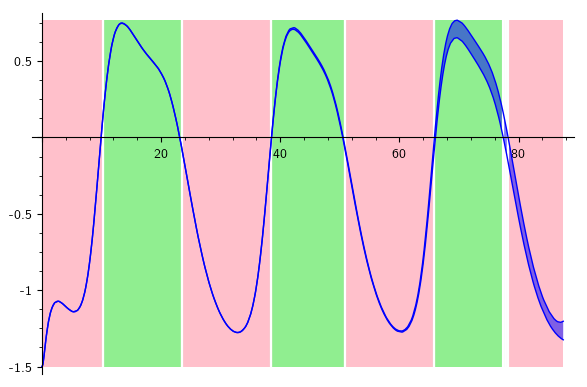

In [18]:
g.set_aspect_ratio('automatic')
g

In [20]:
g = Atomic(abs(s.v("Protein(dEL,iEL;)")) - 0.4).visualize(s, 87.5, order=4, step=(0.001, 0.02), tentative_unpreconditioning=True)

ode in symbolic ring
str_odes = ['[0.000000000000000, 0.000000000000000]', 'x1*[-0.300000000000000, -0.300000000000000] + x10', '[0.000000000000000, 0.000000000000000]', 'x13*[0.640000000000000, 0.640000000000000] + x3*[-0.560000000000000, -0.560000000000000]', 'x4*[-0.380000000000000, -0.380000000000000] + x8', 'x5*[-0.680000000000000, -0.680000000000000] + x9*[1.18000000000000, 1.18000000000000]', '[0.000000000000000, 0.000000000000000]', '[0.000000000000000, 0.000000000000000]', 'x8*[-0.570000000000000, -0.570000000000000] + ([1.50000000000000, 1.50000000000000])/((x3)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x4)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x5)^2.00000000000000*[7.71604938271604, 7.71604938271606] + [1.00000000000000, 1.00000000000000])', 'x9*[-0.530000000000000, -0.530000000000000] + ([7.60000000000000, 7.60000000000000])/((x1)^2.00000000000000*[39.0624999999999, 39.0625000000000] + (x3)^2.00000000000000*[0.694444444444444, 0.6944444

SystemError: conjugate returned a result with an error set

args = [1, 1.820?, 1, 0.2227?, 0.4007?, 2.759?, 1, 1, 0.2307?, 1.776?, 1.785?, 1, 1.840000000000?, 0.2996?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0007?
args = [1, 1.820?, 1, 0.2227?, 0.4007?, 2.759?, 1, 1, 0.2307?, 1.776?, 1.785?, 1, 1.840000000000?, 0.2996?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 1.9?, 1, 0.223?, 0.41?, 2.76?, 1, 1, 0.23?, 1.8?, 1.79?, 1, 1.9?, 0.299?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.01?
args = [1, 1.9?, 1, 0.23?, 0.403?, 2.77?, 1, 1, 0.23?, 1.75?, 1.79?, 1, 1.9?, 0.298?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.003?
args = [1, 1.9?, 1, 0.226?, 0.41?, 2.77?, 1, 1, 0.23?, 1.8?, 1.79?, 1, 1.9?, 0.297?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.01?
args = [1, 1.9?, 1, 0.227?, 0.406?, 2.78?, 1, 1, 0.23?, 1.8?, 1.80?, 1, 1.9?, 0.296?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.006?
args = [1, 2.0?, 1, 0.23?, 0.407?, 2.78?, 1, 1, 0.23?, 1.7?, 1.80?, 1, 2.0?, 0.296?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.007?
args = [1, 2.0?, 1, 0.230?, 0.41?, 2.78?, 1, 1, 0.22?, 1.68?, 1.80?, 1, 2.0?, 0.295?]
f = <sage.ext.interpreters.wrapper_el.Wrappe

SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 3.713?, 1, 0.2714?, 0.3997?, 2.019?, 1, 1, 0.1145?, 0.658?, 1.836?, 1, 3.80000000000?, 0.2406?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.0003?
args = [1, 3.713?, 1, 0.2714?, 0.3997?, 2.019?, 1, 1, 0.1145?, 0.658?, 1.836?, 1, 3.80000000000?, 0.2406?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

args = [1, 3.72?, 1, 0.2714?, 0.399?, 2.01?, 1, 1, 0.115?, 0.66?, 1.836?, 1, 3.8?, 0.241?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.001?
args = [1, 3.8?, 1, 0.2715?, 0.399?, 2.00?, 1, 1, 0.114?, 0.65?, 1.837?, 1, 3.9?, 0.241?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.001?
args = [1, 3.75?, 1, 0.2715?, 0.398?, 1.99?, 1, 1, 0.114?, 0.64?, 1.837?, 1, 3.9?, 0.241?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.002?
args = [1, 3.8?, 1, 0.2715?, 0.397?, 1.98?, 1, 1, 0.113?, 0.64?, 1.838?, 1, 3.9?, 0.241?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.003?
args = [1, 3.8?, 1, 0.2716?, 0.396?, 2.0?, 1, 1, 0.113?, 0.63?, 1.838?, 1, 3.9?, 0.240?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.004?
args = [1, 3.79?, 1, 0.2716?, 0.396?, 2.0?, 1, 1, 0.113?, 0.62?, 1.839?, 1, 3.9?, 0.240?]
f = <sage

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set



args = [1, 4.0?, 1, 0.2720?, 0.384?, 1.8?, 1, 1, 0.1097?, 0.53?, 1.850?, 1, 4.3?, 0.240?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.016?
args = [1, 4.02?, 1, 0.2720?, 0.383?, 1.8?, 1, 1, 0.1096?, 0.53?, 1.85?, 1, 4.3?, 0.240?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.017?
args = [1, 4.03?, 1, 0.2720?, 0.382?, 1.74?, 1, 1, 0.1096?, 0.52?, 1.86?, 1, 4.3?, 0.241?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.018?
args = [1, 4.1?, 1, 0.2721?, 0.382?, 1.73?, 1, 1, 0.1096?, 0.51?, 1.852?, 1, 4.3?, 0.241?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.019?
args = [1, 4.06?, 1, 0.2721?, 0.381?, 1.72?, 1, 1, 0.1096?, 0.51?, 1.853?, 1, 4.3?, 0.241?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.019?
args = [1, 4.07?, 1, 0.2721?, 0.380?, 1.71?, 1, 1, 0.1096?, 0.50?, 1.854?, 1, 4.4?, 0.241?]
f =

SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 5.14?, 1, 0.3309?, 0.401?, 0.750?, 1, 1, 0.2389?, 0.1703?, 1.873?, 1, 6.5000000000?, 0.408?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.001?
args = [1, 5.14?, 1, 0.3309?, 0.401?, 0.750?, 1, 1, 0.2389?, 0.1703?, 1.873?, 1, 6.5000000000?, 0.408?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 5.14?, 1, 0.34?, 0.41?, 0.75?, 1, 1, 0.24?, 0.17?, 1.88?, 1, 6.5?, 0.41?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.01?
args = [1, 5.15?, 1, 0.34?, 0.41?, 0.74?, 1, 1, 0.25?, 0.17?, 1.87?, 1, 6.6?, 0.42?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.01?
args = [1, 5.16?, 1, 0.34?, 0.41?, 0.74?, 1, 1, 0.25?, 0.17?, 1.87?, 1, 6.6?, 0.42?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.01?
args = [1, 5.16?, 1, 0.34?, 0.41?, 0.73?, 1, 1, 0.25?, 0.17?, 1.87?, 1, 6.6?, 0.42?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.01?
args = [1, 5.17?, 1, 0.338?, 0.41?, 0.72?, 1, 1, 0.26?, 0.163?, 1.87?, 1, 6.6?, 0.43?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.01?
args = [1, 5.18?, 1, 0.34?, 0.41?, 0.72?, 1, 1, 0.26?, 0.17?, 1.86?, 1, 6.6?, 0.43?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el

y_py = 1.08?
args = [1, 4.73?, 1, 1.11?, 1.49?, 0.18?, 1, 1, 1.03?, 0.040?, 0.91?, 1, 9.9?, 1.52?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.09?
args = [1, 4.72?, 1, 1.11?, 1.50?, 0.176?, 1, 1, 1.03?, 0.040?, 0.90?, 1, 9.9?, 1.52?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.10?
args = [1, 4.71?, 1, 1.12?, 1.51?, 0.18?, 1, 1, 1.03?, 0.040?, 0.90?, 1, 10.0?, 1.53?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.11?
args = [1, 4.70?, 1, 1.13?, 1.52?, 0.173?, 1, 1, 1.03?, 0.040?, 0.89?, 1, 10.0?, 1.54?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.12?
args = [1, 4.69?, 1, 1.13?, 1.52?, 0.18?, 1, 1, 1.03?, 0.039?, 0.89?, 1, 10.0?, 1.54?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.12?
args = [1, 4.68?, 1, 1.14?, 1.53?, 0.170?, 1, 1, 1.03?, 0.039?, 0.88?, 1, 10.0?, 1.55?]
f = <sage.ext.interprete

y_py = 1.85?
args = [1, 2.50?, 1, 2.09?, 2.25?, 0.0645?, 1, 1, 0.828?, 0.039?, 0.26?, 1, 13.9?, 1.993?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.85?
args = [1, 2.49?, 1, 2.10?, 2.25?, 0.0645?, 1, 1, 0.83?, 0.039?, 0.256?, 1, 13.9?, 1.993?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.85?
args = [1, 2.48?, 1, 2.10?, 2.25?, 0.0646?, 1, 1, 0.83?, 0.039?, 0.26?, 1, 13.9?, 1.993?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.85?
args = [1, 2.47?, 1, 2.10?, 2.25?, 0.0646?, 1, 1, 0.83?, 0.039?, 0.26?, 1, 13.9?, 1.993?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.85?
args = [1, 2.46?, 1, 2.10?, 2.25?, 0.0646?, 1, 1, 0.83?, 0.039?, 0.26?, 1, 14.0?, 1.993?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.85?
args = [1, 2.45?, 1, 2.10?, 2.241?, 0.0647?, 1, 1, 0.822?, 0.040?, 0.25?, 1, 14.0?, 1.993?]
f =

y_py = 1.75?
args = [1, 1.66?, 1, 2.202?, 2.14?, 0.091?, 1, 1, 0.752?, 0.075?, 0.142?, 1, 15.9?, 1.956?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.74?
args = [1, 1.65?, 1, 2.202?, 2.14?, 0.092?, 1, 1, 0.751?, 0.076?, 0.142?, 1, 15.9?, 1.956?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.74?
args = [1, 1.64?, 1, 2.203?, 2.14?, 0.092?, 1, 1, 0.751?, 0.076?, 0.141?, 1, 15.9?, 1.955?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.74?
args = [1, 1.63?, 1, 2.203?, 2.14?, 0.093?, 1, 1, 0.751?, 0.077?, 0.140?, 1, 15.9?, 1.955?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.74?
args = [1, 1.63?, 1, 2.203?, 2.14?, 0.093?, 1, 1, 0.750?, 0.077?, 0.139?, 1, 16.0?, 1.954?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.74?
args = [1, 1.62?, 1, 2.204?, 2.14?, 0.094?, 1, 1, 0.750?, 0.078?, 0.139?, 1, 16.0?, 1.9

args = [1, 0.76?, 1, 2.156?, 1.96?, 0.35?, 1, 1, 0.688?, 0.32?, 0.070?, 1, 19.5?, 1.83?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.56?
args = [1, 0.76?, 1, 2.16?, 1.96?, 0.35?, 1, 1, 0.687?, 0.32?, 0.069?, 1, 19.5?, 1.82?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.56?
args = [1, 0.76?, 1, 2.16?, 1.96?, 0.35?, 1, 1, 0.686?, 0.32?, 0.069?, 1, 19.5?, 1.82?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.56?
args = [1, 0.75?, 1, 2.16?, 1.96?, 0.35?, 1, 1, 0.69?, 0.32?, 0.069?, 1, 19.5?, 1.82?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.56?
args = [1, 0.75?, 1, 2.16?, 1.95?, 0.36?, 1, 1, 0.69?, 0.32?, 0.069?, 1, 19.6?, 1.82?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.55?
args = [1, 0.75?, 1, 2.152?, 1.95?, 0.36?, 1, 1, 0.684?, 0.33?, 0.069?, 1, 19.6?, 1.82?]
f = <sage.ext.interpreters.wrapp

y_py = 1.49?
args = [1, 0.62?, 1, 2.10?, 1.89?, 0.52?, 1, 1, 0.63?, 0.46?, 0.0647?, 1, 20.5?, 1.73?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.49?
args = [1, 0.61?, 1, 2.10?, 1.88?, 0.52?, 1, 1, 0.63?, 0.47?, 0.0646?, 1, 20.6?, 1.73?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.48?
args = [1, 0.61?, 1, 2.10?, 1.88?, 0.53?, 1, 1, 0.63?, 0.47?, 0.0646?, 1, 20.6?, 1.72?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.48?
args = [1, 0.61?, 1, 2.10?, 1.88?, 0.53?, 1, 1, 0.63?, 0.47?, 0.0646?, 1, 20.6?, 1.72?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.48?
args = [1, 0.61?, 1, 2.10?, 1.88?, 0.53?, 1, 1, 0.63?, 0.48?, 0.0645?, 1, 20.6?, 1.72?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.48?
args = [1, 0.61?, 1, 2.09?, 1.88?, 0.54?, 1, 1, 0.63?, 0.48?, 0.0645?, 1, 20.6?, 1.72?]
f = <sage.ext.inter

y_py = 0.92?
args = [1, 0.365?, 1, 1.62?, 1.31?, 1.59?, 1, 1, 0.28?, 1.27?, 0.080?, 1, 24.0?, 1.11?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.91?
args = [1, 0.364?, 1, 1.61?, 1.31?, 1.59?, 1, 1, 0.28?, 1.27?, 0.080?, 1, 24.1?, 1.11?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.91?
args = [1, 0.363?, 1, 1.61?, 1.31?, 1.60?, 1, 1, 0.28?, 1.28?, 0.080?, 1, 24.1?, 1.11?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.91?
args = [1, 0.363?, 1, 1.61?, 1.30?, 1.61?, 1, 1, 0.28?, 1.28?, 0.080?, 1, 24.1?, 1.10?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.90?
args = [1, 0.362?, 1, 1.60?, 1.30?, 1.62?, 1, 1, 0.28?, 1.29?, 0.081?, 1, 24.1?, 1.10?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.90?
args = [1, 0.362?, 1, 1.60?, 1.29?, 1.63?, 1, 1, 0.28?, 1.29?, 0.081?, 1, 24.1?, 1.09?]
f = <sage.ext.inter

args = [1, 0.40?, 1, 0.98?, 0.66?, 2.91?, 1, 1, 0.091?, 1.89?, 0.18?, 1, 27.4?, 0.59?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.26?
args = [1, 0.40?, 1, 0.98?, 0.65?, 2.92?, 1, 1, 0.090?, 1.89?, 0.18?, 1, 27.4?, 0.59?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.25?
args = [1, 0.40?, 1, 0.97?, 0.65?, 2.92?, 1, 1, 0.089?, 1.89?, 0.18?, 1, 27.4?, 0.59?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.25?
args = [1, 0.399?, 1, 0.97?, 0.65?, 2.93?, 1, 1, 0.089?, 1.89?, 0.180?, 1, 27.4?, 0.59?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.25?
args = [1, 0.40?, 1, 0.97?, 0.64?, 2.93?, 1, 1, 0.088?, 1.89?, 0.181?, 1, 27.4?, 0.58?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.24?
args = [1, 0.41?, 1, 0.96?, 0.64?, 2.94?, 1, 1, 0.088?, 1.89?, 0.182?, 1, 27.5?, 0.58?]
f = <sage.ext.interpreters.wrapper

SystemError: conjugate returned a result with an error set

args = [1, 0.604?, 1, 0.682?, 0.400?, 2.95?, 1, 1, 0.055?, 1.52?, 0.345?, 1, 29.320000000?, 0.401?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.000?
args = [1, 0.604?, 1, 0.682?, 0.400?, 2.95?, 1, 1, 0.055?, 1.52?, 0.345?, 1, 29.320000000?, 0.401?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 0.61?, 1, 0.68?, 0.40?, 2.95?, 1, 1, 0.054?, 1.51?, 0.35?, 1, 29.4?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.00?
args = [1, 0.61?, 1, 0.68?, 0.40?, 2.95?, 1, 1, 0.054?, 1.51?, 0.35?, 1, 29.4?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.00?
args = [1, 0.606?, 1, 0.681?, 0.399?, 2.95?, 1, 1, 0.0541?, 1.51?, 0.346?, 1, 29.330000000?, 0.401?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.001?
args = [1, 0.61?, 1, 0.68?, 0.40?, 2.95?, 1, 1, 0.054?, 1.51?, 0.35?, 1, 29.4?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

args = [1, 0.608?, 1, 0.680?, 0.398?, 2.95?, 1, 1, 0.0540?, 1.51?, 0.347?, 1, 29.340000000?, 0.400?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.002?
args = [1, 0.608?, 1, 0.680?, 0.398?, 2.95?, 1, 1, 0.0540?, 1.51?, 0.347?, 1, 29.340000000?, 0.400?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 0.61?, 1, 0.68?, 0.40?, 2.94?, 1, 1, 0.054?, 1.50?, 0.35?, 1, 29.4?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.01?
args = [1, 0.62?, 1, 0.68?, 0.40?, 2.94?, 1, 1, 0.054?, 1.50?, 0.35?, 1, 29.4?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.01?
args = [1, 0.62?, 1, 0.68?, 0.40?, 2.93?, 1, 1, 0.054?, 1.49?, 0.36?, 1, 29.4?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.01?
args = [1, 0.62?, 1, 0.67?, 0.39?, 2.93?, 1, 1, 0.054?, 1.48?, 0.36?, 1, 29.4?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.01?
args = [1, 0.63?, 1, 0.67?, 0.39?, 2.92?, 1, 1, 0.054?, 1.48?, 0.36?, 1, 29.5?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.01?
args = [1, 0.63?, 1, 0.67?, 0.39?, 2.92?, 1, 1, 0.053?, 1.47?, 0.36?, 1, 29.5?, 0.40?]
f = <sage.ext.interpreters.wrappe

args = [1, 1.8?, 1, 0.396?, 0.223?, 1.52?, 1, 1, 0.081?, 0.51?, 1.03?, 1, 32.8?, 0.285?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.177?
args = [1, 1.8?, 1, 0.395?, 0.223?, 1.6?, 1, 1, 0.082?, 0.50?, 1.03?, 1, 32.8?, 0.286?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.177?
args = [1, 1.8?, 1, 0.40?, 0.223?, 1.5?, 1, 1, 0.082?, 0.50?, 1.04?, 1, 32.8?, 0.286?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.178?
args = [1, 1.8?, 1, 0.40?, 0.223?, 1.50?, 1, 1, 0.083?, 0.49?, 1.04?, 1, 32.8?, 0.286?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.178?
args = [1, 1.8?, 1, 0.393?, 0.223?, 1.49?, 1, 1, 0.084?, 0.49?, 1.05?, 1, 32.8?, 0.287?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.178?
args = [1, 1.8?, 1, 0.392?, 0.223?, 1.48?, 1, 1, 0.084?, 0.49?, 1.05?, 1, 32.9?, 0.287?]
f = <sage.ext.interp

SystemError: conjugate returned a result with an error set

args = [1, 3.16?, 1, 0.447?, 0.40?, 0.63?, 1, 1, 0.33?, 0.166?, 1.38?, 1, 35.400000000?, 0.55?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.00?
args = [1, 3.16?, 1, 0.447?, 0.40?, 0.63?, 1, 1, 0.33?, 0.166?, 1.38?, 1, 35.400000000?, 0.55?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

args = [1, 3.2?, 1, 0.45?, 0.40?, 0.62?, 1, 1, 0.33?, 0.17?, 1.38?, 1, 35.4?, 0.55?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.00?
args = [1, 3.2?, 1, 0.45?, 0.40?, 0.62?, 1, 1, 0.33?, 0.17?, 1.38?, 1, 35.4?, 0.55?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.00?
args = [1, 3.17?, 1, 0.448?, 0.41?, 0.63?, 1, 1, 0.33?, 0.166?, 1.38?, 1, 35.410000000?, 0.55?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.01?
args = [1, 3.2?, 1, 0.45?, 0.40?, 0.62?, 1, 1, 0.33?, 0.17?, 1.38?, 1, 35.4?, 0.55?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

args = [1, 3.17?, 1, 0.449?, 0.41?, 0.62?, 1, 1, 0.33?, 0.165?, 1.38?, 1, 35.420000000?, 0.56?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.01?
args = [1, 3.17?, 1, 0.449?, 0.41?, 0.62?, 1, 1, 0.33?, 0.165?, 1.38?, 1, 35.420000000?, 0.56?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 3.2?, 1, 0.45?, 0.41?, 0.62?, 1, 1, 0.33?, 0.17?, 1.37?, 1, 35.5?, 0.56?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.01?
args = [1, 3.2?, 1, 0.46?, 0.41?, 0.61?, 1, 1, 0.34?, 0.17?, 1.37?, 1, 35.5?, 0.56?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.01?
args = [1, 3.2?, 1, 0.46?, 0.41?, 0.61?, 1, 1, 0.34?, 0.17?, 1.37?, 1, 35.5?, 0.56?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.01?
args = [1, 3.2?, 1, 0.46?, 0.42?, 0.61?, 1, 1, 0.34?, 0.160?, 1.37?, 1, 35.5?, 0.57?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.02?
args = [1, 3.2?, 1, 0.46?, 0.42?, 0.60?, 1, 1, 0.35?, 0.16?, 1.37?, 1, 35.5?, 0.57?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.02?
args = [1, 3.3?, 1, 0.46?, 0.43?, 0.60?, 1, 1, 0.35?, 0.16?, 1.36?, 1, 35.6?, 0.58?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el 

f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.27?
args = [1, 3.5?, 1, 0.62?, 0.68?, 0.41?, 1, 1, 0.58?, 0.106?, 1.18?, 1, 36.6?, 0.86?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.28?
args = [1, 3.49?, 1, 0.62?, 0.68?, 0.41?, 1, 1, 0.59?, 0.105?, 1.18?, 1, 36.6?, 0.86?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.28?
args = [1, 3.49?, 1, 0.63?, 0.69?, 0.41?, 1, 1, 0.59?, 0.104?, 1.17?, 1, 36.6?, 0.87?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.29?
args = [1, 3.5?, 1, 0.63?, 0.70?, 0.40?, 1, 1, 0.60?, 0.11?, 1.17?, 1, 36.6?, 0.88?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.30?
args = [1, 3.5?, 1, 0.63?, 0.70?, 0.40?, 1, 1, 0.60?, 0.103?, 1.16?, 1, 36.6?, 0.88?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.30?
args = [1, 3.50?, 1, 0.64?, 0.71?, 0.40?,

f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.41?
args = [1, 3.1?, 1, 1.43?, 1.9?, 0.152?, 1, 1, 1.02?, 0.050?, 0.55?, 1, 39.4?, 1.73?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.5?
args = [1, 3.1?, 1, 1.44?, 1.82?, 0.16?, 1, 1, 1.02?, 0.050?, 0.55?, 1, 39.4?, 1.73?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.42?
args = [1, 3.0?, 1, 1.44?, 1.83?, 0.15?, 1, 1, 1.02?, 0.050?, 0.54?, 1, 39.4?, 1.74?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.43?
args = [1, 3.0?, 1, 1.45?, 1.9?, 0.15?, 1, 1, 1.02?, 0.050?, 0.54?, 1, 39.4?, 1.74?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.5?
args = [1, 3.0?, 1, 1.46?, 1.84?, 0.15?, 1, 1, 1.02?, 0.050?, 0.54?, 1, 39.5?, 1.75?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.44?
args = [1, 3.0?, 1, 1.46?, 1.9?, 0.15?, 1, 1,

args = [1, 1.7?, 1, 2.13?, 2.19?, 0.116?, 1, 1, 0.79?, 0.085?, 0.18?, 1, 43.2?, 1.96?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.79?
args = [1, 1.61?, 1, 2.13?, 2.19?, 0.12?, 1, 1, 0.79?, 0.09?, 0.17?, 1, 43.2?, 1.96?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.79?
args = [1, 1.6?, 1, 2.13?, 2.19?, 0.117?, 1, 1, 0.79?, 0.086?, 0.17?, 1, 43.2?, 1.96?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.79?
args = [1, 1.6?, 1, 2.13?, 2.2?, 0.12?, 1, 1, 0.79?, 0.09?, 0.17?, 1, 43.3?, 1.96?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.8?
args = [1, 1.59?, 1, 2.13?, 2.2?, 0.118?, 1, 1, 0.79?, 0.087?, 0.17?, 1, 43.3?, 1.96?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.8?
args = [1, 1.6?, 1, 2.14?, 2.2?, 0.12?, 1, 1, 0.79?, 0.09?, 0.17?, 1, 43.3?, 1.96?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_e

f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.6?
args = [1, 0.82?, 1, 2.16?, 2.0?, 0.32?, 1, 1, 0.70?, 0.28?, 0.081?, 1, 46.5?, 1.84?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.6?
args = [1, 0.82?, 1, 2.16?, 2.0?, 0.32?, 1, 1, 0.69?, 0.28?, 0.081?, 1, 46.6?, 1.84?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.6?
args = [1, 0.82?, 1, 2.16?, 1.99?, 0.32?, 1, 1, 0.69?, 0.28?, 0.080?, 1, 46.6?, 1.84?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.59?
args = [1, 0.81?, 1, 2.16?, 1.99?, 0.32?, 1, 1, 0.69?, 0.29?, 0.080?, 1, 46.6?, 1.84?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.59?
args = [1, 0.81?, 1, 2.16?, 1.99?, 0.33?, 1, 1, 0.69?, 0.29?, 0.080?, 1, 46.6?, 1.84?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.59?
args = [1, 0.81?, 1, 2.16?, 1.99?, 0.33?, 

args = [1, 0.45?, 1, 1.9?, 1.7?, 0.98?, 1, 1, 0.45?, 0.82?, 0.070?, 1, 49.9?, 1.42?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.3?
args = [1, 0.45?, 1, 1.88?, 1.7?, 1.0?, 1, 1, 0.44?, 0.9?, 0.070?, 1, 49.9?, 1.42?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.3?
args = [1, 0.45?, 1, 1.88?, 1.7?, 1.0?, 1, 1, 0.44?, 0.83?, 0.070?, 1, 49.9?, 1.5?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.3?
args = [1, 0.45?, 1, 1.9?, 1.7?, 1.00?, 1, 1, 0.44?, 0.9?, 0.070?, 1, 49.9?, 1.41?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.3?
args = [1, 0.45?, 1, 1.9?, 1.7?, 1.0?, 1, 1, 0.44?, 0.84?, 0.070?, 1, 49.9?, 1.41?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.3?
args = [1, 0.45?, 1, 1.87?, 1.61?, 1.1?, 1, 1, 0.43?, 0.9?, 0.070?, 1, 50.0?, 1.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0

f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.55?
args = [1, 0.36?, 1, 1.27?, 1.0?, 2.3?, 1, 1, 0.16?, 1.7?, 0.12?, 1, 53.2?, 0.81?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.6?
args = [1, 0.36?, 1, 1.27?, 0.94?, 2.3?, 1, 1, 0.16?, 1.7?, 0.12?, 1, 53.2?, 0.81?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.54?
args = [1, 0.36?, 1, 1.3?, 1.0?, 2.3?, 1, 1, 0.16?, 1.7?, 0.12?, 1, 53.2?, 0.8?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.6?
args = [1, 0.36?, 1, 1.26?, 0.93?, 2.3?, 1, 1, 0.16?, 1.7?, 0.12?, 1, 53.3?, 0.80?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.53?
args = [1, 0.36?, 1, 1.3?, 0.93?, 2.3?, 1, 1, 0.16?, 1.7?, 0.12?, 1, 53.3?, 0.80?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.53?
args = [1, 0.36?, 1, 1.3?, 1.0?, 2.3?, 1, 1, 0.16?, 1.7?, 0

args = [1, 0.6?, 1, 0.72?, 0.43?, 2.9?, 1, 1, 0.06?, 1.6?, 0.31?, 1, 56.5?, 0.43?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.03?
args = [1, 0.57?, 1, 0.72?, 0.43?, 2.9?, 1, 1, 0.06?, 1.6?, 0.31?, 1, 56.5?, 0.43?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.03?
args = [1, 0.57?, 1, 0.72?, 0.43?, 2.9?, 1, 1, 0.06?, 1.6?, 0.32?, 1, 56.6?, 0.42?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.03?
args = [1, 0.6?, 1, 0.71?, 0.43?, 2.9?, 1, 1, 0.06?, 1.6?, 0.32?, 1, 56.6?, 0.42?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.03?
args = [1, 0.58?, 1, 0.71?, 0.42?, 2.9?, 1, 1, 0.06?, 1.6?, 0.32?, 1, 56.6?, 0.42?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.02?
args = [1, 0.58?, 1, 0.71?, 0.42?, 2.9?, 1, 1, 0.06?, 1.6?, 0.32?, 1, 56.6?, 0.42?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at

SystemError: conjugate returned a result with an error set

args = [1, 0.7?, 1, 0.68?, 0.40?, 2.9?, 1, 1, 0.06?, 1.5?, 0.35?, 1, 56.8?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.00?
args = [1, 0.7?, 1, 0.68?, 0.40?, 2.9?, 1, 1, 0.06?, 1.5?, 0.35?, 1, 56.8?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.00?
args = [1, 0.61?, 1, 0.68?, 0.40?, 2.9?, 1, 1, 0.056?, 1.5?, 0.35?, 1, 56.81000000?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.00?
args = [1, 0.7?, 1, 0.68?, 0.40?, 2.9?, 1, 1, 0.06?, 1.5?, 0.35?, 1, 56.8?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

args = [1, 0.62?, 1, 0.68?, 0.40?, 2.9?, 1, 1, 0.056?, 1.5?, 0.35?, 1, 56.9?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.00?
args = [1, 0.62?, 1, 0.68?, 0.40?, 2.9?, 1, 1, 0.056?, 1.5?, 0.35?, 1, 56.9?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.00?
args = [1, 0.62?, 1, 0.68?, 0.40?, 2.9?, 1, 1, 0.056?, 1.5?, 0.35?, 1, 56.83000000?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.00?
args = [1, 0.62?, 1, 0.68?, 0.40?, 2.9?, 1, 1, 0.056?, 1.5?, 0.35?, 1, 56.9?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

args = [1, 0.62?, 1, 0.68?, 0.40?, 2.9?, 1, 1, 0.06?, 1.5?, 0.35?, 1, 56.9?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.00?
args = [1, 0.62?, 1, 0.68?, 0.40?, 2.9?, 1, 1, 0.06?, 1.5?, 0.35?, 1, 56.9?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.00?
args = [1, 0.62?, 1, 0.68?, 0.40?, 2.9?, 1, 1, 0.06?, 1.5?, 0.35?, 1, 56.85000000?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.00?
args = [1, 0.62?, 1, 0.68?, 0.40?, 2.9?, 1, 1, 0.06?, 1.5?, 0.35?, 1, 56.9?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 0.7?, 1, 0.67?, 0.40?, 2.9?, 1, 1, 0.06?, 1.5?, 0.36?, 1, 56.9?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.01?
args = [1, 0.63?, 1, 0.67?, 0.39?, 2.9?, 1, 1, 0.06?, 1.5?, 0.36?, 1, 56.9?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.01?
args = [1, 0.63?, 1, 0.67?, 0.39?, 2.9?, 1, 1, 0.06?, 1.5?, 0.36?, 1, 56.9?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.01?
args = [1, 0.7?, 1, 0.67?, 0.39?, 2.9?, 1, 1, 0.06?, 1.5?, 0.36?, 1, 57.0?, 0.40?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.01?
args = [1, 0.64?, 1, 0.66?, 0.39?, 2.8?, 1, 1, 0.055?, 1.5?, 0.37?, 1, 57.0?, 0.39?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.01?
args = [1, 0.64?, 1, 0.66?, 0.39?, 2.8?, 1, 1, 0.06?, 1.4?, 0.37?, 1, 57.0?, 0.39?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el obj

args = [1, 0.9?, 1, 0.53?, 0.30?, 2.4?, 1, 1, 0.06?, 1.1?, 0.6?, 1, 58.2?, 0.33?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.11?
args = [1, 1.0?, 1, 0.53?, 0.30?, 2.4?, 1, 1, 0.06?, 1.1?, 0.6?, 1, 58.2?, 0.33?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.11?
args = [1, 1.0?, 1, 0.53?, 0.29?, 2.4?, 1, 1, 0.06?, 1.0?, 0.56?, 1, 58.2?, 0.32?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.11?
args = [1, 1.0?, 1, 0.53?, 0.29?, 2.4?, 1, 1, 0.06?, 1.0?, 0.6?, 1, 58.3?, 0.32?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.11?
args = [1, 1.0?, 1, 0.53?, 0.29?, 2.4?, 1, 1, 0.06?, 1.0?, 0.57?, 1, 58.3?, 0.32?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.11?
args = [1, 1.0?, 1, 0.53?, 0.29?, 2.4?, 1, 1, 0.06?, 1.0?, 0.6?, 1, 58.3?, 0.32?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x

f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.16?
args = [1, 1.4?, 1, 0.44?, 0.24?, 1.9?, 1, 1, 0.07?, 0.7?, 0.9?, 1, 59.4?, 0.29?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.16?
args = [1, 1.4?, 1, 0.44?, 0.24?, 1.9?, 1, 1, 0.07?, 0.7?, 0.9?, 1, 59.4?, 0.29?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.16?
args = [1, 1.4?, 1, 0.44?, 0.24?, 1.9?, 1, 1, 0.07?, 0.7?, 0.9?, 1, 59.5?, 0.29?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.16?
args = [1, 1.4?, 1, 0.44?, 0.24?, 1.8?, 1, 1, 0.07?, 0.7?, 0.9?, 1, 59.5?, 0.29?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.16?
args = [1, 1.4?, 1, 0.44?, 0.24?, 1.8?, 1, 1, 0.07?, 0.7?, 0.9?, 1, 59.5?, 0.29?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.16?
args = [1, 1.4?, 1, 0.44?, 0.24?, 1.8?, 1, 1, 0.07?, 0.7

y_py = -0.1?
args = [1, 3.0?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.3?, 0.18?, 1.4?, 1, 62.7?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.1?
args = [1, 3.0?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.3?, 0.18?, 1.4?, 1, 62.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.0?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.3?, 0.18?, 1.4?, 1, 62.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.0?, 1, 0.5?, 0.39?, 0.7?, 1, 1, 0.31?, 0.18?, 1.4?, 1, 62.73000000?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.01?
args = [1, 3.0?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.3?, 0.18?, 1.4?, 1, 62.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

args = [1, 3.0?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.31?, 0.18?, 1.4?, 1, 62.74000000?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.0?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.31?, 0.18?, 1.4?, 1, 62.74000000?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

args = [1, 3.?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.1?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.75000000?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

args = [1, 3.1?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.1?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.1?, 1, 0.45?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.77000000?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.1?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)


args = [1, 3.1?, 1, 0.45?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.1?, 1, 0.45?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.1?, 1, 0.45?, 0.4?, 0.7?, 1, 1, 0.32?, 0.17?, 1.4?, 1, 62.79000000?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.1?, 1, 0.45?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 3.1?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.1?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.1?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.81000000?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.1?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)


args = [1, 3.1?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.9?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.1?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.9?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.1?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.83000000?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.1?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.9?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)


args = [1, 3.1?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.9?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.1?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.9?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 3.1?, 1, 0.5?, 0.5?, 0.7?, 1, 1, 0.33?, 0.17?, 1.4?, 1, 62.85000000?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.1?
args = [1, 3.1?, 1, 0.5?, 0.4?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.9?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 3.1?, 1, 0.5?, 0.5?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.86000000?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.1?
args = [1, 3.1?, 1, 0.5?, 0.5?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.86000000?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 3.1?, 1, 0.5?, 0.5?, 0.7?, 1, 1, 0.4?, 0.17?, 1.4?, 1, 62.9?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.1?
args = [1, 3.1?, 1, 0.46?, 0.5?, 0.6?, 1, 1, 0.4?, 0.16?, 1.4?, 1, 62.9?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.1?
args = [1, 3.1?, 1, 0.5?, 0.5?, 0.6?, 1, 1, 0.4?, 0.16?, 1.3?, 1, 62.9?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.1?
args = [1, 3.1?, 1, 0.5?, 0.5?, 0.6?, 1, 1, 0.4?, 0.16?, 1.3?, 1, 63.0?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.1?
args = [1, 3.1?, 1, 0.5?, 0.5?, 0.6?, 1, 1, 0.4?, 0.16?, 1.3?, 1, 63.0?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.1?
args = [1, 3.1?, 1, 0.5?, 0.5?, 0.6?, 1, 1, 0.4?, 0.16?, 1.3?, 1, 63.0?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.1?
arg

args = [1, 3.4?, 1, 0.9?, 1.1?, 0.27?, 1, 1, 0.9?, 0.08?, 0.9?, 1, 65.1?, 1.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.7?
args = [1, 3.4?, 1, 0.9?, 1.1?, 0.27?, 1, 1, 0.9?, 0.08?, 0.9?, 1, 65.1?, 1.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.7?
args = [1, 3.4?, 1, 0.9?, 1.1?, 0.27?, 1, 1, 0.9?, 0.08?, 0.9?, 1, 65.1?, 1.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.7?
args = [1, 3.4?, 1, 0.9?, 1.2?, 0.27?, 1, 1, 0.9?, 0.08?, 0.9?, 1, 65.2?, 1.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.8?
args = [1, 3.4?, 1, 1.0?, 1.2?, 0.3?, 1, 1, 0.9?, 0.07?, 0.9?, 1, 65.2?, 1.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.8?
args = [1, 3.4?, 1, 1.0?, 1.2?, 0.26?, 1, 1, 0.9?, 0.07?, 0.9?, 1, 65.2?, 1.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.8?

y_py = 2.?
args = [1, 3.?, 1, 1.9?, 2.2?, 0.11?, 1, 1, 0.9?, 0.06?, 0.4?, 1, 68.4?, 1.9?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.8?
args = [1, 2.3?, 1, 1.9?, 2.2?, 0.11?, 1, 1, 0.9?, 0.06?, 0.4?, 1, 68.5?, 1.9?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.8?
args = [1, 2.3?, 1, 1.9?, 2.2?, 0.11?, 1, 1, 0.9?, 0.06?, 0.4?, 1, 68.5?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.8?
args = [1, 2.3?, 1, 1.9?, 2.2?, 0.11?, 1, 1, 0.9?, 0.06?, 0.4?, 1, 68.5?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.8?
args = [1, 2.3?, 1, 1.9?, 2.2?, 0.11?, 1, 1, 0.9?, 0.06?, 0.4?, 1, 68.5?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.8?
args = [1, 2.3?, 1, 1.9?, 2.2?, 0.11?, 1, 1, 0.9?, 0.06?, 0.4?, 1, 68.5?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>


args = [1, 1.3?, 1, 2.2?, 2.1?, 0.2?, 1, 1, 0.8?, 0.13?, 0.12?, 1, 71.8?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.7?
args = [1, 1.3?, 1, 2.2?, 2.1?, 0.16?, 1, 1, 0.8?, 0.13?, 0.12?, 1, 71.8?, 1.9?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.7?
args = [1, 1.3?, 1, 2.2?, 2.1?, 0.16?, 1, 1, 0.8?, 0.13?, 0.12?, 1, 71.8?, 1.9?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.7?
args = [1, 1.3?, 1, 2.2?, 2.1?, 0.2?, 1, 1, 0.8?, 0.2?, 0.12?, 1, 71.8?, 1.9?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.7?
args = [1, 1.3?, 1, 2.2?, 2.1?, 0.2?, 1, 1, 0.8?, 0.2?, 0.12?, 1, 71.8?, 1.9?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.7?
args = [1, 1.3?, 1, 2.2?, 2.1?, 0.2?, 1, 1, 0.8?, 0.2?, 0.12?, 1, 71.9?, 1.9?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.7?

y_py = 1.5?
args = [1, 0.7?, 1, 2.1?, 1.9?, 0.5?, 1, 1, 0.6?, 0.5?, 0.07?, 1, 75.1?, 1.7?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.5?
args = [1, 0.7?, 1, 2.1?, 1.9?, 0.5?, 1, 1, 0.6?, 0.5?, 0.07?, 1, 75.1?, 1.7?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.5?
args = [1, 0.7?, 1, 2.1?, 1.9?, 0.5?, 1, 1, 0.6?, 0.5?, 0.07?, 1, 75.1?, 1.7?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.5?
args = [1, 0.7?, 1, 2.1?, 1.9?, 0.5?, 1, 1, 0.6?, 0.5?, 0.07?, 1, 75.2?, 1.7?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.5?
args = [1, 0.7?, 1, 2.1?, 1.9?, 0.5?, 1, 1, 0.6?, 0.5?, 0.07?, 1, 75.2?, 1.7?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.5?
args = [1, 0.7?, 1, 2.1?, 1.9?, 0.5?, 1, 1, 0.6?, 0.5?, 0.07?, 1, 75.2?, 1.7?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py

args = [1, 0.4?, 1, 1.7?, 1.4?, 1.4?, 1, 1, 0.3?, 2.?, 0.08?, 1, 78.4?, 1.2?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.0?
args = [1, 0.4?, 1, 1.7?, 1.4?, 2.?, 1, 1, 0.3?, 2.?, 0.08?, 1, 78.4?, 1.2?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.0?
args = [1, 0.4?, 1, 1.7?, 2.?, 2.?, 1, 1, 0.3?, 2.?, 0.08?, 1, 78.5?, 1.2?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.?
args = [1, 0.4?, 1, 1.7?, 2.?, 2.?, 1, 1, 0.3?, 2.?, 0.08?, 1, 78.5?, 1.2?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.?
args = [1, 0.4?, 1, 1.7?, 2.?, 2.?, 1, 1, 0.3?, 2.?, 0.08?, 1, 78.5?, 1.2?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.?
args = [1, 0.4?, 1, 2.?, 2.?, 2.?, 1, 1, 0.3?, 2.?, 0.08?, 1, 78.5?, 1.2?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 1.?
args = [1, 0.4?, 1, 2.?,

y_py = 0.3?
args = [1, 0.4?, 1, 1.?, 0.7?, 3.?, 1, 1, 0.1?, 2.?, 0.2?, 1, 81.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.3?
args = [1, 0.4?, 1, 1.0?, 0.7?, 3.?, 1, 1, 0.1?, 2.?, 0.2?, 1, 81.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.3?
args = [1, 0.4?, 1, 1.0?, 0.7?, 3.?, 1, 1, 0.1?, 2.?, 0.2?, 1, 81.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.3?
args = [1, 0.4?, 1, 1.0?, 0.7?, 3.?, 1, 1, 0.1?, 2.?, 0.2?, 1, 81.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.3?
args = [1, 0.4?, 1, 1.0?, 0.7?, 3.?, 1, 1, 0.1?, 2.?, 0.2?, 1, 81.8?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.3?
args = [1, 0.4?, 1, 1.0?, 0.7?, 3.?, 1, 1, 0.1?, 2.?, 0.2?, 1, 81.9?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.3?
args = [1, 

SystemError: conjugate returned a result with an error set

args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.72000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.72000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.8?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.8?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.73000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.8?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.8?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.8?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.75000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.8?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)


args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.8?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.8?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.77000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.8?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.8?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.8?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.79000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.8?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)


args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.8?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.8?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.81000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.8?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.9?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.9?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.83000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.9?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.9?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.9?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.85000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.9?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.9?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.9?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.87000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.9?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.9?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.9?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.89000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.9?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.9?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.9?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.91000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.9?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.0?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.0?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.93000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.0?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)


args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.0?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.0?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.95000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.0?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.0?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.0?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.97000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.0?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.0?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.0?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 83.99000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.0?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.0?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.0?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.01000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.0?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)


args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.1?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.1?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.03000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.1?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)


args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.1?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.1?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.05000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.1?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)


args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.1?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.1?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.07000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.1?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.1?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.1?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.09000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.1?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)


args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.1?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.1?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.11000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.1?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.2?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.2?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.13000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.3?, 1, 84.2?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 1.?, 1, 84.2?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 1.?, 1, 84.2?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 1.?, 1, 84.15000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 1.?, 1, 84.2?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.2?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.2?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.17000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.2?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.2?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.2?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.19000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.2?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.2?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.2?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.6?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.21000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.2?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError

args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.3?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.3?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.23000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.3?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.3?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.3?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.25000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.3?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.3?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.3?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.27000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.3?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.3?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.3?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.29000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.3?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.3?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.3?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.31000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.3?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.4?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.4?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.33000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.4?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError

args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.4?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.4?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.35000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.4?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)


args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.4?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.4?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.37000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.4?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)


args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.4?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.4?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.39000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.4?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.4?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.4?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.41000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.4?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.5?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.5?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.7?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.43000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.5?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.5?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.5?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.45000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.5?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)


args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.5?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.5?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.47000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.5?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.5?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.5?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.49000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.5?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.5?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.5?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.51000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.5?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.6?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.6?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.53000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.6?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.6?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.6?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.55000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.6?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.6?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.6?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.57000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.6?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.6?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.6?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.59000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.6?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)


args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.6?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.6?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.61000000?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = 0.0?
args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.6?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2dfd66a8>


SystemError: conjugate returned a result with an error set


SystemError: conjugate returned a result with an error set

Exception ignored in: 'flowstar.interval.apply_interval'
Traceback (most recent call last):
  File "sage/ext/interpreters/wrapper_el.pyx", line 96, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3339)
  File "sage/ext/interpreters/wrapper_el.pyx", line 87, in sage.ext.interpreters.wrapper_el.Wrapper_el.__call__ (build/cythonized/sage/ext/interpreters/wrapper_el.c:3269)
SystemError: conjugate returned a result with an error set


args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.7?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.1?
args = [1, 0.7?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.7?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.1?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.7?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.1?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.7?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.1?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.7?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.1?
args = [1, 1.?, 1, 0.6?, 0.4?, 3.?, 1, 1, 0.1?, 2.?, 0.4?, 1, 84.8?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.1?
args = [1, 1.?, 1, 0

args = [1, 1.?, 1, 0.5?, 0.3?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 85.97?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.1?
args = [1, 1.?, 1, 0.5?, 0.3?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 85.98?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.1?
args = [1, 1.?, 1, 0.5?, 0.3?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 85.99?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.1?
args = [1, 1.?, 1, 0.5?, 0.3?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.00?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.1?
args = [1, 1.?, 1, 0.5?, 0.3?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.01?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.1?
args = [1, 1.?, 1, 0.5?, 0.3?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.02?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.1?
args = [1, 1.?, 1, 0.5

y_py = -0.2?
args = [1, 2.?, 1, 0.5?, 0.3?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.37?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.5?, 0.3?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.38?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.5?, 0.3?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.38?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.5?, 0.3?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.39?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.5?, 0.3?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.39?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.5?, 0.3?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.40?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1

f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.3?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.65?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.3?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.66?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.66?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.67?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.68?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.68?, 0.3?]
f = <sage.ext.interpre

args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.92?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.93?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.93?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.93?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.93?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.94?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4

args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.23?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.23?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.24?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.24?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.24?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.24?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4

y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.372?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.373?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.38?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.38?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.38?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.38?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = 

args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.48?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.48?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.476?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.48?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.479?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.48?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa2e9d68c8>
y_py = -0.2?
args = [1, 2.?, 1, 0

args = [1, 4.785?, 1, 0.2873?, 0.3596?, 1.065?, 1, 1, 0.1501?, 0.262?, 1.908?, 1, 5.6271755558?, 0.2966?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.0404?
args = [1, 4.94?, 1, 0.2990?, 0.3676?, 0.936?, 1, 1, 0.1760?, 0.2226?, 1.907?, 1, 5.9539768125?, 0.3292?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.0324?
args = [1, 5.23?, 1, 0.3551?, 0.430?, 0.667?, 1, 1, 0.283?, 0.1485?, 1.836?, 1, 6.7823713931?, 0.462?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.030?
args = [1, 5.27?, 1, 0.374?, 0.453?, 0.619?, 1, 1, 0.315?, 0.1364?, 1.805?, 1, 6.9602245029?, 0.501?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.053?
args = [1, 5.36?, 1, 0.466?, 0.579?, 0.469?, 1, 1, 0.464?, 0.1002?, 1.644?, 1, 7.6147745292?, 0.680?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.179?
args = [1, 5.36?, 1, 0.524?, 0.6

args = [1, 0.356?, 1, 1.155?, 0.823?, 2.60?, 1, 1, 0.126?, 1.83?, 0.132?, 1, 26.348372990?, 0.716?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.423?
args = [1, 0.367?, 1, 1.084?, 0.754?, 2.73?, 1, 1, 0.111?, 1.87?, 0.147?, 1, 26.727371744?, 0.664?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.354?
args = [1, 0.388?, 1, 1.001?, 0.675?, 2.88?, 1, 1, 0.095?, 1.89?, 0.169?, 1, 27.195671232?, 0.605?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.275?
args = [1, 0.437?, 1, 0.881?, 0.566?, 3.02?, 1, 1, 0.076?, 1.84?, 0.214?, 1, 27.920071380?, 0.524?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.166?
args = [1, 0.467?, 1, 0.830?, 0.521?, 3.05?, 1, 1, 0.069?, 1.79?, 0.239?, 1, 28.250839432?, 0.491?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.121?
args = [1, 0.520?, 1, 0.760?, 0.462?, 3.04?, 1, 1, 0.06

args = [1, 0.65?, 1, 2.10?, 1.90?, 0.49?, 1, 1, 0.63?, 0.43?, 0.071?, 1, 47.74059035?, 1.74?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.50?
args = [1, 0.58?, 1, 2.06?, 1.9?, 0.60?, 1, 1, 0.59?, 0.52?, 0.069?, 1, 48.31053351?, 1.67?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.5?
args = [1, 0.54?, 1, 2.02?, 1.79?, 0.70?, 1, 1, 0.55?, 0.60?, 0.069?, 1, 48.77153835?, 1.60?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.39?
args = [1, 0.49?, 1, 1.96?, 1.8?, 0.83?, 1, 1, 0.50?, 0.71?, 0.069?, 1, 49.30413689?, 1.52?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.4?
args = [1, 0.46?, 1, 1.90?, 1.64?, 0.96?, 1, 1, 0.45?, 0.80?, 0.070?, 1, 49.75083412?, 1.44?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.24?
args = [1, 0.44?, 1, 1.86?, 1.60?, 1.1?, 1, 1, 0.43?, 0.86?, 0.071?, 1, 50.00311733?, 1.39?]
f

args = [1, 2.1?, 1, 2.0?, 2.2?, 0.11?, 1, 1, 0.9?, 0.06?, 0.3?, 1, 69.16952118?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.8?
args = [1, 1.9?, 1, 2.0?, 2.2?, 0.11?, 1, 1, 0.9?, 0.07?, 0.3?, 1, 69.48179821?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.8?
args = [1, 1.8?, 1, 2.1?, 2.2?, 0.11?, 1, 1, 0.8?, 0.08?, 0.20?, 1, 70.01811582?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.8?
args = [1, 1.6?, 1, 2.1?, 2.2?, 0.12?, 1, 1, 0.8?, 0.09?, 0.17?, 1, 70.55494585?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.8?
args = [1, 1.5?, 1, 2.2?, 2.2?, 0.13?, 1, 1, 0.8?, 0.10?, 0.16?, 1, 70.85632102?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.8?
args = [1, 1.4?, 1, 2.2?, 2.2?, 0.2?, 1, 1, 0.8?, 0.1?, 0.15?, 1, 71.09773980?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wra

args = [1, 3.302?, 1, 0.2689?, 0.4178?, 2.331?, 1, 1, 0.1298?, 0.861?, 1.828?, 1, 3.27088301935?, 0.2489?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.0178?
args = [1, 3.65?, 1, 0.2712?, 0.4029?, 2.071?, 1, 1, 0.1163?, 0.688?, 1.834?, 1, 3.71296440464?, 0.2415?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.0029?
args = [1, 4.021?, 1, 0.2720?, 0.3829?, 1.753?, 1, 1, 0.1097?, 0.523?, 1.851?, 1, 4.25199534758?, 0.2401?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.0171?
args = [1, 4.23?, 1, 0.2728?, 0.3717?, 1.565?, 1, 1, 0.1113?, 0.441?, 1.866?, 1, 4.58804604300?, 0.2446?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.0283?
args = [1, 4.47?, 1, 0.2755?, 0.3618?, 1.354?, 1, 1, 0.1197?, 0.360?, 1.886?, 1, 4.99390738751?, 0.2571?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.0382?
args = [1, 4.69

args = [1, 0.683?, 1, 2.132?, 1.93?, 0.420?, 1, 1, 0.664?, 0.379?, 0.0664?, 1, 19.970082952?, 1.781?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.53?
args = [1, 0.628?, 1, 2.107?, 1.892?, 0.492?, 1, 1, 0.638?, 0.441?, 0.0650?, 1, 20.388009435?, 1.739?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.492?
args = [1, 0.572?, 1, 2.070?, 1.848?, 0.589?, 1, 1, 0.601?, 0.521?, 0.0642?, 1, 20.872236876?, 1.680?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.448?
args = [1, 0.520?, 1, 2.021?, 1.79?, 0.710?, 1, 1, 0.553?, 0.619?, 0.0641?, 1, 21.393879822?, 1.604?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.39?
args = [1, 0.487?, 1, 1.977?, 1.74?, 0.811?, 1, 1, 0.514?, 0.700?, 0.0647?, 1, 21.781327783?, 1.540?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.34?
args = [1, 0.460?, 1, 1.932?, 1.69?, 0.910?, 1

args = [1, 1.19?, 1, 2.18?, 2.10?, 0.18?, 1, 1, 0.74?, 0.144?, 0.114?, 1, 44.716313196?, 1.93?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.70?
args = [1, 1.08?, 1, 2.18?, 2.1?, 0.20?, 1, 1, 0.73?, 0.18?, 0.102?, 1, 45.19570596?, 1.91?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.7?
args = [1, 1.00?, 1, 2.18?, 2.05?, 0.23?, 1, 1, 0.72?, 0.20?, 0.095?, 1, 45.55822735?, 1.89?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.65?
args = [1, 0.91?, 1, 2.17?, 2.02?, 0.27?, 1, 1, 0.71?, 0.24?, 0.087?, 1, 46.05033306?, 1.87?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.62?
args = [1, 0.84?, 1, 2.17?, 2.00?, 0.31?, 1, 1, 0.70?, 0.27?, 0.082?, 1, 46.42043816?, 1.85?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.60?
args = [1, 0.79?, 1, 2.15?, 1.98?, 0.35?, 1, 1, 0.69?, 0.31?, 0.078?, 1, 46.75485166?, 1.8

args = [1, 3.4?, 1, 1.0?, 1.2?, 0.3?, 1, 1, 0.9?, 0.07?, 0.9?, 1, 65.15028413?, 1.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.8?
args = [1, 3.3?, 1, 1.1?, 1.4?, 0.22?, 1, 1, 1.0?, 0.07?, 0.8?, 1, 65.66644508?, 1.5?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.0?
args = [1, 4.?, 1, 1.2?, 1.6?, 0.19?, 1, 1, 1.0?, 0.06?, 0.7?, 1, 66.09953119?, 1.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.2?
args = [1, 3.?, 1, 1.4?, 1.7?, 0.17?, 1, 1, 1.0?, 0.06?, 0.6?, 1, 66.49938552?, 1.7?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.3?
args = [1, 2.8?, 1, 1.6?, 1.9?, 0.14?, 1, 1, 1.0?, 0.05?, 0.5?, 1, 67.11090186?, 1.8?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.5?
args = [1, 2.9?, 1, 1.5?, 1.9?, 0.15?, 1, 1, 1.0?, 0.05?, 0.5?, 1, 66.93042156?, 1.8?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_

args = [1, 4.87?, 1, 0.2931?, 0.3630?, 0.994?, 1, 1, 0.1632?, 0.2397?, 1.909?, 1, 5.8042929357?, 0.3131?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.0370?
args = [1, 5.09?, 1, 0.3196?, 0.388?, 0.802?, 1, 1, 0.218?, 0.1843?, 1.888?, 1, 6.3378667579?, 0.381?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.013?
args = [1, 5.17?, 1, 0.3374?, 0.408?, 0.725?, 1, 1, 0.251?, 0.1636?, 1.864?, 1, 6.5829676765?, 0.423?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.008?
args = [1, 5.27?, 1, 0.3730?, 0.452?, 0.621?, 1, 1, 0.314?, 0.1367?, 1.806?, 1, 6.9555410072?, 0.500?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.052?
args = [1, 5.34?, 1, 0.427?, 0.523?, 0.522?, 1, 1, 0.402?, 0.1125?, 1.713?, 1, 7.3667125507?, 0.605?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.123?
args = [1, 5.35?, 1, 0.551?, 0.700?

args = [1, 0.67?, 1, 0.638?, 0.366?, 2.86?, 1, 1, 0.052?, 1.40?, 0.391?, 1, 29.683533506?, 0.376?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.034?
args = [1, 0.85?, 1, 0.553?, 0.305?, 2.57?, 1, 1, 0.050?, 1.13?, 0.52?, 1, 30.478485580?, 0.331?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.095?
args = [1, 0.89?, 1, 0.538?, 0.295?, 2.50?, 1, 1, 0.050?, 1.07?, 0.545?, 1, 30.64015766?, 0.324?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.106?
args = [1, 1.07?, 1, 0.488?, 0.264?, 2.24?, 1, 1, 0.053?, 0.89?, 0.657?, 1, 31.203899868?, 0.302?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.137?
args = [1, 1.18?, 1, 0.465?, 0.250?, 2.10?, 1, 1, 0.056?, 0.80?, 0.73?, 1, 31.50980412?, 0.293?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.150?
args = [1, 1.50?, 1, 0.417?, 0.228?, 1.73?, 1, 1, 0.069?, 0

args = [1, 0.36?, 1, 1.42?, 1.10?, 2.0?, 1, 1, 0.21?, 1.5?, 0.096?, 1, 52.40460199?, 0.94?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.70?
args = [1, 0.36?, 1, 1.39?, 1.07?, 2.0?, 1, 1, 0.20?, 1.6?, 0.099?, 1, 52.56349380?, 0.91?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.67?
args = [1, 0.36?, 1, 1.29?, 0.96?, 2.3?, 1, 1, 0.17?, 1.7?, 0.12?, 1, 53.09762565?, 0.82?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.56?
args = [1, 0.36?, 1, 1.22?, 0.89?, 2.4?, 1, 1, 0.15?, 1.8?, 0.13?, 1, 53.45537921?, 0.77?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.49?
args = [1, 0.37?, 1, 1.12?, 0.79?, 2.6?, 1, 1, 0.12?, 1.8?, 0.14?, 1, 53.97490786?, 0.69?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.39?
args = [1, 0.40?, 1, 1.00?, 0.68?, 2.8?, 1, 1, 0.10?, 1.9?, 0.17?, 1, 54.63912305?, 0.61?]
f = <sage.ex

args = [1, 0.9?, 1, 2.2?, 2.0?, 0.3?, 1, 1, 0.7?, 0.3?, 0.09?, 1, 73.65719446?, 1.9?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.6?
args = [1, 0.8?, 1, 2.2?, 2.0?, 0.4?, 1, 1, 0.7?, 0.3?, 0.08?, 1, 74.15997655?, 1.8?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.6?
args = [1, 0.7?, 1, 2.1?, 1.9?, 0.5?, 1, 1, 0.7?, 0.4?, 0.07?, 1, 74.85245096?, 1.8?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.5?
args = [1, 0.7?, 1, 2.1?, 1.9?, 0.5?, 1, 1, 0.6?, 0.5?, 0.07?, 1, 75.22951135?, 1.7?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.5?
args = [1, 0.6?, 1, 2.0?, 2.?, 0.6?, 1, 1, 0.6?, 0.6?, 0.07?, 1, 75.80936264?, 1.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 2.?
args = [1, 0.6?, 1, 2.0?, 1.8?, 0.7?, 1, 1, 0.6?, 0.6?, 0.07?, 1, 76.09482049?, 1.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el ob

args = [1, 3.975?, 1, 0.2719?, 0.3854?, 1.794?, 1, 1, 0.1099?, 0.542?, 1.848?, 1, 4.18114557686?, 0.2397?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.0146?
args = [1, 4.232?, 1, 0.2728?, 0.372?, 1.563?, 1, 1, 0.1113?, 0.440?, 1.866?, 1, 4.59245966318?, 0.2447?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.029?
args = [1, 4.481?, 1, 0.2759?, 0.3612?, 1.336?, 1, 1, 0.1209?, 0.353?, 1.888?, 1, 5.0295875039?, 0.2586?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.0388?
args = [1, 4.73?, 1, 0.2840?, 0.3584?, 1.117?, 1, 1, 0.1423?, 0.2784?, 1.906?, 1, 5.5036770016?, 0.2866?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.0416?
args = [1, 4.99?, 1, 0.3044?, 0.3724?, 0.893?, 1, 1, 0.188?, 0.2101?, 1.904?, 1, 6.0710798468?, 0.3433?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.0276?
args = [1, 5.13?

args = [1, 0.609?, 1, 2.096?, 1.879?, 0.522?, 1, 1, 0.626?, 0.466?, 0.0646?, 1, 20.546051981?, 1.721?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.479?
args = [1, 0.568?, 1, 2.066?, 1.85?, 0.598?, 1, 1, 0.597?, 0.529?, 0.0641?, 1, 20.916392361?, 1.674?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.45?
args = [1, 0.529?, 1, 2.030?, 1.800?, 0.687?, 1, 1, 0.562?, 0.601?, 0.0641?, 1, 21.301697444?, 1.618?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.400?
args = [1, 0.482?, 1, 1.969?, 1.73?, 0.829?, 1, 1, 0.507?, 0.714?, 0.0648?, 1, 21.848888407?, 1.528?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.33?
args = [1, 0.454?, 1, 1.919?, 1.67?, 0.939?, 1, 1, 0.466?, 0.799?, 0.0659?, 1, 22.223170118?, 1.460?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.27?
args = [1, 0.431?, 1, 1.868?, 1.61?, 1.049?, 1

f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.40?
args = [1, 2.83?, 1, 1.59?, 1.97?, 0.132?, 1, 1, 1.00?, 0.048?, 0.47?, 1, 39.87219341?, 1.82?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.57?
args = [1, 2.9?, 1, 1.54?, 1.92?, 0.138?, 1, 1, 1.01?, 0.049?, 0.50?, 1, 39.69939043?, 1.80?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.52?
args = [1, 2.76?, 1, 1.63?, 2.01?, 0.127?, 1, 1, 0.99?, 0.048?, 0.45?, 1, 40.04499639?, 1.85?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.61?
args = [1, 2.69?, 1, 1.68?, 2.05?, 0.121?, 1, 1, 0.98?, 0.048?, 0.42?, 1, 40.238553016?, 1.87?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.65?
args = [1, 2.6?, 1, 1.74?, 2.09?, 0.116?, 1, 1, 0.96?, 0.049?, 0.39?, 1, 40.47488298?, 1.90?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.69

args = [1, 3.3?, 1, 1.1?, 1.4?, 0.22?, 1, 1, 1.0?, 0.07?, 0.8?, 1, 65.69428377?, 1.5?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.0?
args = [1, 4.?, 1, 1.3?, 1.6?, 0.19?, 1, 1, 1.0?, 0.06?, 0.7?, 1, 66.18855191?, 1.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.2?
args = [1, 3.0?, 1, 1.4?, 1.7?, 0.17?, 1, 1, 1.0?, 0.06?, 0.6?, 1, 66.55602782?, 1.7?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.3?
args = [1, 3.?, 1, 1.5?, 1.9?, 0.14?, 1, 1, 1.0?, 0.05?, 0.5?, 1, 67.07908158?, 1.8?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.5?
args = [1, 2.9?, 1, 1.5?, 1.9?, 0.15?, 1, 1, 1.0?, 0.05?, 0.6?, 1, 66.90324237?, 1.8?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.5?
args = [1, 2.8?, 1, 1.6?, 2.0?, 0.14?, 1, 1, 1.0?, 0.05?, 0.5?, 1, 67.25492079?, 1.8?]
f = <sage.ext.interpreters.wrapper_el.Wrapper

args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 86.81724256?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.2?
args = [1, 2.?, 1, 0.4?, 0.2?, 2.?, 1, 1, 0.1?, 1.?, 1.?, 1, 87.24142692?, 0.3?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.2?
args = [1, 0.?e-7, 1, 0.?e-8, 0.?e-7, 0.?e-7, 1, 1, 0.?e-6, 0.?e-6, 0.00000?, 1, 0, 0.?e-6]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.4000000?
args = [1, 0.2204?, 1, 0.06612?, 0.1413?, 0.9642?, 1, 1, 0.3962?, 2.838?, 0.938?, 1, 0.5388845202649?, 0.3302?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.2587?
args = [1, 0.692?, 1, 0.1343?, 0.2672?, 1.954?, 1, 1, 0.3443?, 2.666?, 1.462?, 1, 0.966415648877?, 0.3364?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.1329?
args = [1, 0.934?, 1, 0.1590?, 0.3089?, 2.254?, 1, 1, 0.3168?, 2.465?, 1.5

args = [1, 0.632?, 1, 2.109?, 1.895?, 0.486?, 1, 1, 0.640?, 0.435?, 0.0651?, 1, 20.355267600?, 1.743?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.495?
args = [1, 0.600?, 1, 2.090?, 1.872?, 0.537?, 1, 1, 0.621?, 0.478?, 0.0645?, 1, 20.622574313?, 1.712?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.472?
args = [1, 0.539?, 1, 2.041?, 1.82?, 0.662?, 1, 1, 0.572?, 0.581?, 0.0640?, 1, 21.196555947?, 1.634?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.42?
args = [1, 0.502?, 1, 1.998?, 1.77?, 0.762?, 1, 1, 0.533?, 0.661?, 0.0644?, 1, 21.598311965?, 1.571?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.37?
args = [1, 0.461?, 1, 1.934?, 1.69?, 0.907?, 1, 1, 0.478?, 0.775?, 0.0656?, 1, 22.118592031?, 1.480?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.29?
args = [1, 0.443?, 1, 1.898?, 1.641?, 0.985?, 

args = [1, 1.52?, 1, 2.15?, 2.17?, 0.124?, 1, 1, 0.78?, 0.094?, 0.157?, 1, 43.48600450?, 1.96?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.77?
args = [1, 1.34?, 1, 2.17?, 2.14?, 0.144?, 1, 1, 0.76?, 0.116?, 0.133?, 1, 44.10401505?, 1.94?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.74?
args = [1, 1.27?, 1, 2.18?, 2.12?, 0.16?, 1, 1, 0.75?, 0.129?, 0.123?, 1, 44.40549569?, 1.94?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.72?
args = [1, 1.18?, 1, 2.18?, 2.10?, 0.18?, 1, 1, 0.74?, 0.15?, 0.113?, 1, 44.75104401?, 1.92?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.70?
args = [1, 1.08?, 1, 2.18?, 2.08?, 0.20?, 1, 1, 0.73?, 0.17?, 0.103?, 1, 45.17977033?, 1.91?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.68?
args = [1, 0.99?, 1, 2.18?, 2.05?, 0.23?, 1, 1, 0.72?, 0.20?, 0.095?, 1, 45.58992282?

args = [1, 2.1?, 1, 2.0?, 2.2?, 0.11?, 1, 1, 0.9?, 0.06?, 0.27?, 1, 68.98980006?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.8?
args = [1, 1.9?, 1, 2.0?, 2.2?, 0.11?, 1, 1, 0.9?, 0.07?, 0.3?, 1, 69.49196266?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.8?
args = [1, 1.8?, 1, 2.1?, 2.2?, 0.11?, 1, 1, 0.8?, 0.07?, 0.2?, 1, 69.89644772?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.8?
args = [1, 1.7?, 1, 2.1?, 2.2?, 0.11?, 1, 1, 0.8?, 0.08?, 0.19?, 1, 70.20736424?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.8?
args = [1, 1.5?, 1, 2.2?, 2.2?, 0.13?, 1, 1, 0.8?, 0.10?, 0.15?, 1, 70.92717125?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 1.8?
args = [1, 1.4?, 1, 2.2?, 2.2?, 0.2?, 1, 1, 0.8?, 0.10?, 0.15?, 1, 71.07850022?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wr

args = [1, 2.739?, 1, 0.2589?, 0.4282?, 2.640?, 1, 1, 0.1614?, 1.176?, 1.825?, 1, 2.65803070480?, 0.2665?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.0282?
args = [1, 2.968?, 1, 0.2640?, 0.4263?, 2.533?, 1, 1, 0.1474?, 1.043?, 1.827?, 1, 2.89405668075?, 0.2589?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.0263?
args = [1, 3.296?, 1, 0.2688?, 0.4180?, 2.336?, 1, 1, 0.1301?, 0.864?, 1.828?, 1, 3.26366061680?, 0.2491?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.0180?
args = [1, 3.701?, 1, 0.2714?, 0.4003?, 2.029?, 1, 1, 0.1148?, 0.663?, 1.836?, 1, 3.78345343047?, 0.2408?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = 0.0003?
args = [1, 3.96?, 1, 0.2719?, 0.3866?, 1.813?, 1, 1, 0.1101?, 0.551?, 1.847?, 1, 4.14839356088?, 0.2396?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.0134?
args = [1, 4.27

args = [1, 0.95?, 1, 0.519?, 0.282?, 2.41?, 1, 1, 0.051?, 1.01?, 0.584?, 1, 30.84799904?, 0.315?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.118?
args = [1, 1.09?, 1, 0.483?, 0.260?, 2.21?, 1, 1, 0.053?, 0.87?, 0.68?, 1, 31.276870398?, 0.300?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.140?
args = [1, 1.25?, 1, 0.452?, 0.244?, 2.01?, 1, 1, 0.058?, 0.75?, 0.77?, 1, 31.692317206?, 0.289?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.157?
args = [1, 1.52?, 1, 0.414?, 0.227?, 1.71?, 1, 1, 0.070?, 0.590?, 0.93?, 1, 32.32638373?, 0.283?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.173?
args = [1, 1.74?, 1, 0.395?, 0.223?, 1.51?, 1, 1, 0.082?, 0.496?, 1.04?, 1, 32.766846299?, 0.286?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.178?
args = [1, 1.89?, 1, 0.385?, 0.224?, 1.38?, 1, 1, 0.094?, 0

y_py = -0.16?
args = [1, 1.6?, 1, 0.41?, 0.23?, 1.6?, 1, 1, 0.08?, 0.6?, 1.0?, 1, 59.96844472?, 0.29?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.17?
args = [1, 1.9?, 1, 0.39?, 0.23?, 1.4?, 1, 1, 0.10?, 0.5?, 1.1?, 1, 60.52924067?, 0.30?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.17?
args = [1, 2.2?, 1, 0.38?, 0.24?, 1.2?, 1, 1, 0.13?, 0.35?, 1.2?, 1, 61.03712415?, 0.32?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.16?
args = [1, 2.4?, 1, 0.38?, 0.26?, 1.1?, 1, 1, 0.15?, 0.31?, 1.3?, 1, 61.38194313?, 0.35?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.14?
args = [1, 2.6?, 1, 0.39?, 0.28?, 0.9?, 1, 1, 0.18?, 0.26?, 1.3?, 1, 61.79275094?, 0.4?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7efa1827d488>
y_py = -0.12?
args = [1, 2.8?, 1, 0.40?, 0.4?, 0.8?, 1, 1, 0.3?, 0.22?, 1.4?, 1, 62.15435763?, 0.5?]
f = <sa

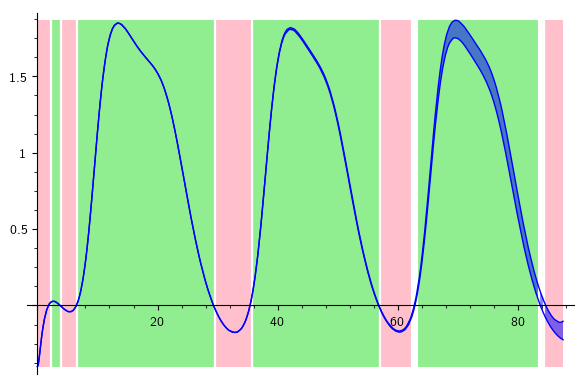

In [21]:
g.set_aspect_ratio('automatic')
g